In [6]:
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import math
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random

In [7]:
data = load_wine()
X = []
y = []

In [8]:
for i in range(130):
    X.append(data['data'][i])
    if data['target'][i] == 0:
        y.append(-1)
    if data['target'][i] == 1:
        y.append(1)

In [9]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [10]:
w_t = [0]*13
eta = 0.1
x_axis = []
y_axis_sgd = []
for count in range(10000):
    count += 1
    for i in range(130):
        c = (eta*y[i])/(1+math.exp(y[i]*np.dot(w_t, X[i])))
        v = [c*j for j in X[i]]
        w_t = np.add(w_t, v)
        
    loss = 0
    for i in range(130):
        loss += math.log(1+math.exp(-1*y[i]*np.dot(w_t, X[i])))
    y_axis_sgd.append(loss)
    x_axis.append(count)

In [11]:
y_pred = []
for i in range(130):
    v =np.dot(w_t, X[i])
    if v>0:
        y_pred.append(1)
    else:
        y_pred.append(-1)

In [12]:
accuracy_score(y, y_pred)

1.0

In [13]:
w_t = [0]*13
eta = 0.1
x_axis = []
y_axis_cd = []
for count in range(10000):
    for i in range(130):
        c = (y[i])/(1+math.exp(y[i]*np.dot(w_t, X[i])))
        v = [abs(c*j) for j in X[i]]
        v_new = [c*j for j in X[i]]
        max_index = np.argmax(v)
        w_t[max_index] += eta*v_new[max_index]

    loss = 0
    for i in range(130):
        loss += math.log(1+math.exp(-1*y[i]*np.dot(w_t, X[i])))
    y_axis_cd.append(loss)
    x_axis.append(count)


In [14]:
w_t = [0]*13
eta = 0.1
x_axis = []
y_axis_rd = []
for count in range(10000):
    for i in range(130):
        c = (y[i])/(1+math.exp(y[i]*np.dot(w_t, X[i])))
        v = [abs(c*j) for j in X[i]]
        v_new = [c*j for j in X[i]]
        max_index = random.randint(0, 12)
        w_t[max_index] += eta*v_new[max_index]

    loss = 0
    for i in range(130):
        loss += math.log(1+math.exp(-1*y[i]*np.dot(w_t, X[i])))
    y_axis_rd.append(loss)
    x_axis.append(count)

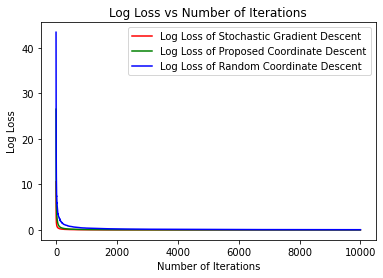

In [15]:
plt.plot(x_axis, y_axis_sgd, color='r', label='Log Loss of Stochastic Gradient Descent')
plt.plot(x_axis, y_axis_cd, color='g', label='Log Loss of Proposed Coordinate Descent')
plt.plot(x_axis, y_axis_rd, color='b', label='Log Loss of Random Coordinate Descent')
plt.xlabel('Number of Iterations')
plt.ylabel('Log Loss')
plt.title('Log Loss vs Number of Iterations')
plt.legend()
plt.show()